Estimación de la utilidad mensual para Banco de Occidente.
Los datos provienen de fuentes públicas por parte de superintendencia financiera.

1. Cargamos los datos


In [2]:
pip install numpy==1.26

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import pmdarima as pm


df = pd.read_excel('Utilidad BDO.xlsx', index_col = 'Fecha') # Con indice de fechas ya que es una serie de tiempo





Verificamos la base


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 78 entries, 2019-01-31 to 2025-06-30
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   BANCO DE OCCIDENTE S.A.   78 non-null     float64
 1   DESEMPLEO_URBANO_         78 non-null     float64
 2   TRM                       78 non-null     float64
 3   USURA_CONSUMO_COMERCIAL   78 non-null     float64
 4   TASA_INTERVENCION_BANREP  78 non-null     float64
 5   IBR_3M                    78 non-null     float64
 6   DTF_EA                    78 non-null     float64
 7   INFLACION ANUAL           78 non-null     float64
 8   INFLACION MES             78 non-null     float64
 9   ISE                       78 non-null     float64
 10  Provisones                78 non-null     int64  
dtypes: float64(10), int64(1)
memory usage: 7.3 KB


Podemos observar que no hay nulos. Procedemos a renombrar la variable 'BANCO DE OCCIDENTE S.A.' a utilidad

In [5]:
df.columns

Index(['BANCO DE OCCIDENTE S.A.', 'DESEMPLEO_URBANO_', 'TRM',
       'USURA_CONSUMO_COMERCIAL', 'TASA_INTERVENCION_BANREP', 'IBR_3M',
       'DTF_EA', 'INFLACION ANUAL', 'INFLACION MES', 'ISE', 'Provisones'],
      dtype='object')

In [6]:
df = df.rename(columns={'BANCO DE OCCIDENTE S.A.': 'UTILIDAD'})

2. Empezamos con el análisis exploratorio debido a que los datos ya se encuentran limpios.

In [7]:
df.describe()

,UTILIDAD,DESEMPLEO_URBANO_,TRM,USURA_CONSUMO_COMERCIAL,TASA_INTERVENCION_BANREP,IBR_3M,DTF_EA,INFLACION ANUAL,INFLACION MES,ISE,Provisones
count,7.800000e+01,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000
mean,3.843242e+10,0.128286,3924.854744,0.310746,0.068205,0.066893,0.069319,0.062356,0.005162,114.949408,0.089744
std,1.501743e+10,0.037498,413.671492,0.060673,0.042684,0.040134,0.040562,0.036385,0.004294,8.387085,0.287664
min,6.753246e+09,0.086550,3072.000000,0.256200,0.017500,0.016590,0.017400,0.014873,-0.003702,86.895520,0.000000
25%,2.983164e+10,0.103531,3716.000000,0.271500,0.033750,0.030817,0.039019,0.035338,0.002530,109.890855,0.000000
50%,3.780270e+10,0.115692,3913.000000,0.286200,0.046250,0.061690,0.051758,0.050477,0.004449,118.468520,0.000000
75%,4.979885e+10,0.140803,4191.750000,0.332475,0.111875,0.109691,0.105066,0.091899,0.007036,121.027101,0.000000
max,7.805879e+10,0.248705,4819.000000,0.470900,0.132500,0.125610,0.143000,0.133408,0.017774,125.616814,1.000000


In [8]:
df.corr()

,UTILIDAD,DESEMPLEO_URBANO_,TRM,USURA_CONSUMO_COMERCIAL,TASA_INTERVENCION_BANREP,IBR_3M,DTF_EA,INFLACION ANUAL,INFLACION MES,ISE,Provisones
UTILIDAD,1.000000,-0.194019,0.080879,-0.090235,0.063626,0.092417,0.016945,0.085948,0.230053,0.312655,-0.269407
DESEMPLEO_URBANO_,-0.194019,1.000000,-0.233365,-0.427145,-0.600508,-0.637849,-0.564754,-0.556273,-0.276598,-0.759347,0.016461
TRM,0.080879,-0.233365,1.000000,0.550023,0.618820,0.641070,0.660200,0.729713,0.403978,0.534340,-0.040706
USURA_CONSUMO_COMERCIAL,-0.090235,-0.427145,0.550023,1.000000,0.822659,0.809178,0.865155,0.863653,0.388029,0.378045,0.179682
TASA_INTERVENCION_BANREP,0.063626,-0.600508,0.618820,0.822659,1.000000,0.990992,0.985005,0.822009,0.324342,0.676739,0.111126
IBR_3M,0.092417,-0.637849,0.641070,0.809178,0.990992,1.000000,0.980485,0.861590,0.380844,0.725096,0.083333
DTF_EA,0.016945,-0.564754,0.660200,0.865155,0.985005,0.980485,1.000000,0.867358,0.350727,0.629816,0.108368
INFLACION ANUAL,0.085948,-0.556273,0.729713,0.863653,0.822009,0.861590,0.867358,1.000000,0.581141,0.612885,0.050595
INFLACION MES,0.230053,-0.276598,0.403978,0.388029,0.324342,0.380844,0.350727,0.581141,1.000000,0.405671,-0.011309
ISE,0.312655,-0.759347,0.534340,0.378045,0.676739,0.725096,0.629816,0.612885,0.405671,1.000000,0.041592


Graficamos mimso eje para ver si encontramos relaciones que nos pueden dar pistas de como modelar la variable

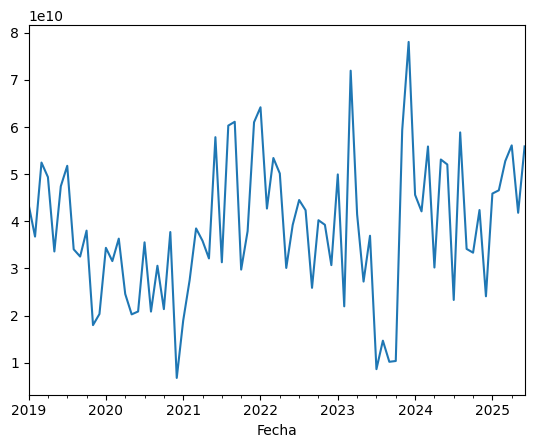

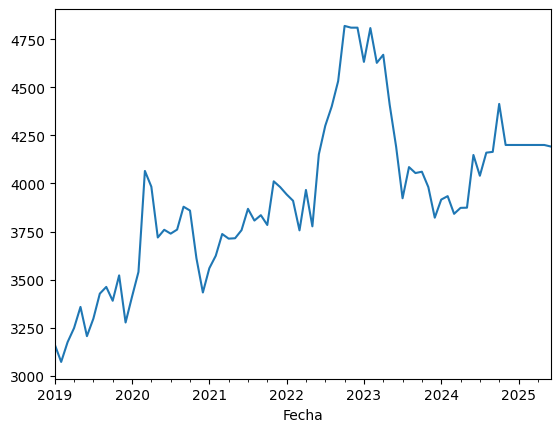

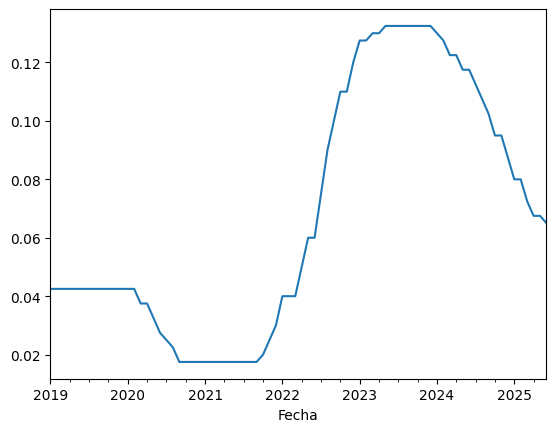

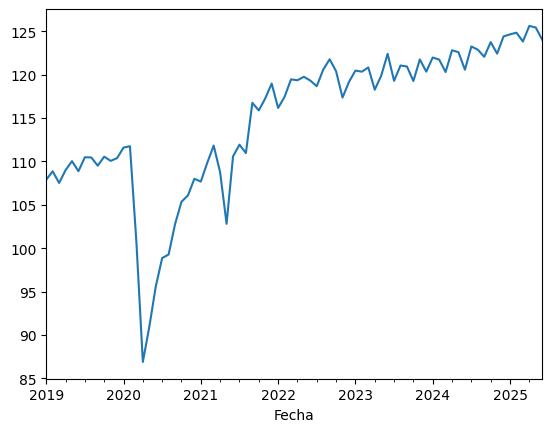

In [9]:
df['UTILIDAD'].plot()
plt.show()


df['TRM'].plot()
plt.show()

df['TASA_INTERVENCION_BANREP'].plot()
plt.show()

df['ISE'].plot()
plt.show()



Empezamos experimentando con los datos, ya que el analisis exploratorio no es suficientmente conclusivo

In [10]:
from sklearn.model_selection import train_test_split
objetivo = 'UTILIDAD'
exog = ['TASA_INTERVENCION_BANREP', 'ISE', 'TRM']


x_train, x_test, y_train, y_test = train_test_split(df[exog], df[objetivo], shuffle = False, test_size= 0.33)





Importamos una regresión lineal como primer paso y tener un baseline para comparar modelos mas complejos

In [11]:
from sklearn.linear_model import LinearRegression

modelo_reg = LinearRegression()

modelo_reg.fit(x_train,y_train)

print(modelo_reg.coef_) # Inspeccionamos los coeficientes del modelo




[-2.60936591e+10  8.61683083e+08 -2.00209673e+06]


In [12]:
pred_modelo = pd.Series(modelo_reg.predict(x_test), index = x_test.index)
pred_modelo.tail()

,0
Fecha,
2025-02-28,4.782619e+10
2025-03-31,4.714838e+10
2025-04-30,4.882491e+10
2025-05-31,4.866252e+10
2025-06-30,4.753540e+10


El modelo de regresión para predecir un promedio de la utilidad, y levenmente parece capturar una tendencia.

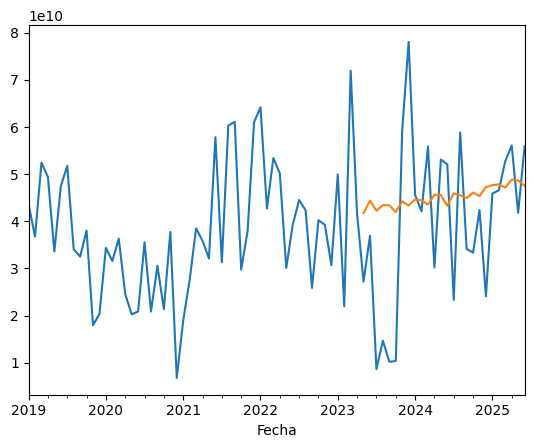

In [13]:
df['UTILIDAD'].plot()
pred_modelo.plot()
plt.show()

Procedemos calcular algunas metricas para tener punto de comparación en el futuro

In [14]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_percentage_error, r2_score

rmse = root_mean_squared_error(y_test, pred_modelo)
mape = mean_absolute_percentage_error(y_test, pred_modelo)
r2 = r2_score(y_test, pred_modelo)

print(f'rmse del modelo: {rmse}')
print(f'mape del modelo: {mape}')
print(f'R^2 del modelo : {r2}')



rmse del modelo: 17554849600.37929
mape del modelo: 0.7032480627128967
R^2 del modelo : -0.02452345446004789


Debido a que el resultado del modelo no es satisfactorio empezamos utilizando técnicas de ingenieria de características. El primer paso será aplicar la transformación logrítmica a la variable objetivo para ver si esto permite mejorar los resultados

In [15]:
df.columns

Index(['UTILIDAD', 'DESEMPLEO_URBANO_', 'TRM', 'USURA_CONSUMO_COMERCIAL',
       'TASA_INTERVENCION_BANREP', 'IBR_3M', 'DTF_EA', 'INFLACION ANUAL',
       'INFLACION MES', 'ISE', 'Provisones'],
      dtype='object')

In [16]:
import numpy as np
df['log_UTILIDAD'] = np.log(df['UTILIDAD'])

[-1.39287113  0.02453835 -0.27557168]


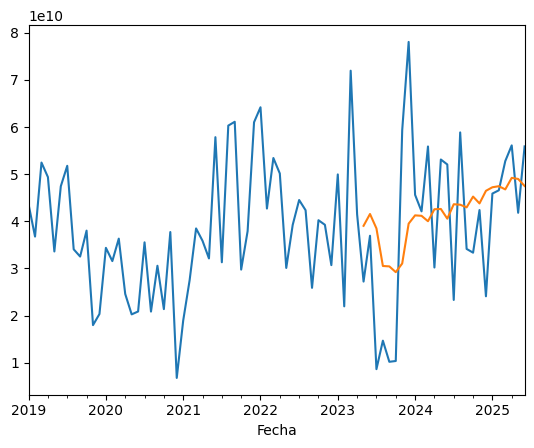

In [87]:
objetivo = 'log_UTILIDAD'
exog = ['TASA_INTERVENCION_BANREP', 'ISE', 'Provisones']

x_train, x_test, y_train, y_test = train_test_split(df[exog], df[objetivo], shuffle = False, test_size= 0.33)

modelo_reg = LinearRegression()

modelo_reg.fit(x_train,y_train)

print(modelo_reg.coef_) # Inspeccionamos los coeficientes del modelo

pred_modelo = pd.Series(modelo_reg.predict(x_test), index = x_test.index)

df['UTILIDAD'].plot()
np.exp(pred_modelo).plot()
plt.show()

In [18]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_percentage_error, r2_score

rmse = root_mean_squared_error(y_test, pred_modelo)
mape = mean_absolute_percentage_error(y_test, pred_modelo)
r2 = r2_score(y_test, pred_modelo)

print(f'rmse del modelo: {rmse}')
print(f'mape del modelo: {mape}')
print(f'R^2 del modelo : {r2}')

rmse del modelo: 0.5399577571469718
mape del modelo: 0.01648948144031082
R^2 del modelo : 0.13958962580926126


In [19]:
df

,UTILIDAD,DESEMPLEO_URBANO_,TRM,USURA_CONSUMO_COMERCIAL,TASA_INTERVENCION_BANREP,IBR_3M,DTF_EA,INFLACION ANUAL,INFLACION MES,ISE,Provisones,log_UTILIDAD
Fecha,,,,,,,,,,,,
2019-01-31,4.356486e+10,0.137393,3163.0,0.287400,0.0425,0.041320,0.046200,0.031477,0.006000,107.893100,0,24.497517
2019-02-28,3.675234e+10,0.124274,3072.0,0.295500,0.0425,0.041400,0.045700,0.030136,0.005765,108.865086,0,24.327468
2019-03-31,5.245682e+10,0.119751,3175.0,0.290600,0.0425,0.041360,0.045100,0.032199,0.004349,107.520459,0,24.683256
2019-04-30,4.937206e+10,0.111443,3248.0,0.289800,0.0425,0.041350,0.045400,0.032454,0.004920,108.992354,0,24.622650
2019-05-31,3.358929e+10,0.112390,3358.0,0.290100,0.0425,0.041260,0.044700,0.033078,0.003134,110.031760,0,24.237473
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-28,4.657417e+10,0.132258,4200.0,0.273075,0.0800,0.072711,0.075631,0.048467,0.007005,124.836302,0,24.564312
2025-03-31,5.276859e+10,0.125758,4200.0,0.267887,0.0725,0.070528,0.071127,0.047054,0.005690,123.822584,0,24.689182
2025-04-30,5.610283e+10,0.126564,4200.0,0.264651,0.0675,0.067683,0.067971,0.044535,0.003517,125.616814,0,24.750452


In [59]:
df['Mes'] = df.index.month

df['Mes'].head()

from sklearn.preprocessing import OneHotEncoder

dummies = pd.get_dummies(df['Mes'], dtype= 'int', drop_first= True)

df = pd.concat([df, dummies], axis = 1)


In [65]:
df.columns = df.columns.astype('str')
df.columns

Index(['UTILIDAD', 'DESEMPLEO_URBANO_', 'TRM', 'USURA_CONSUMO_COMERCIAL',
       'TASA_INTERVENCION_BANREP', 'IBR_3M', 'DTF_EA', 'INFLACION ANUAL',
       'INFLACION MES', 'ISE', 'Provisones', 'log_UTILIDAD', 'Mes', '2', '3',
       '4', '5', '6', '7', '8', '9', '10', '11', '12'],
      dtype='object')

In [81]:


objetivo = 'log_UTILIDAD'
exog = ['IBR_3M', 'Provisones','2', '3',
       '4', '5', '6', '7', '8', '9', '10', '11', '12' ]

x_train, x_test, y_train, y_test = train_test_split(df[exog], df[objetivo], shuffle = False, test_size= 0.33)

modelo_arima = pm.auto_arima(y_train, x_train, start_p=0, start_q=0,
                             max_p=5, max_q=5, trace=True,
                             error_action='ignore',
                             suppress_warnings=True,
                             stepwise=False)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12

 ARIMA(0,0,0)(0,0,0)[1] intercept   : AIC=66.967, Time=0.55 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,0)[1] intercept   : AIC=inf, Time=0.57 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,2)(0,0,0)[1] intercept   : AIC=inf, Time=0.66 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,3)(0,0,0)[1] intercept   : AIC=inf, Time=0.76 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,4)(0,0,0)[1] intercept   : AIC=inf, Time=2.69 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,5)(0,0,0)[1] intercept   : AIC=inf, Time=1.66 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(0,0,0)[1] intercept   : AIC=126.053, Time=0.54 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,0)[1] intercept   : AIC=135.548, Time=0.64 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(0,0,0)[1] intercept   : AIC=inf, Time=0.83 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,3)(0,0,0)[1] intercept   : AIC=inf, Time=0.74 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,4)(0,0,0)[1] intercept   : AIC=213.269, Time=1.01 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(0,0,0)[1] intercept   : AIC=191.750, Time=0.58 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[1] intercept   : AIC=192.311, Time=0.76 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,2)(0,0,0)[1] intercept   : AIC=215.506, Time=0.81 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,3)(0,0,0)[1] intercept   : AIC=203.742, Time=1.13 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,0)(0,0,0)[1] intercept   : AIC=192.180, Time=0.75 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,1)(0,0,0)[1] intercept   : AIC=196.186, Time=0.70 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,2)(0,0,0)[1] intercept   : AIC=inf, Time=nan sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,0)(0,0,0)[1] intercept   : AIC=169.634, Time=2.92 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,1)(0,0,0)[1] intercept   : AIC=196.551, Time=1.31 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,0,0)(0,0,0)[1] intercept   : AIC=215.943, Time=0.90 sec

Best model:  ARIMA(0,0,0)(0,0,0)[1] intercept
Total fit time: 21.323 seconds


In [82]:
pred_modelo =pd.Series(modelo_arima.predict(n_periods = len(x_test), X = x_test), index = x_test.index)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


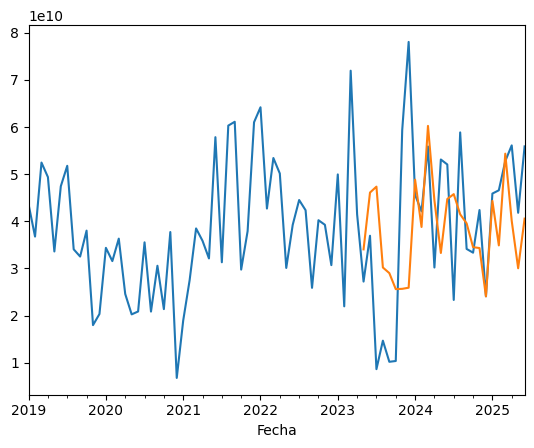

In [83]:
df['UTILIDAD'].plot()
np.exp(pred_modelo).plot()
plt.show()